In [72]:
#Import The Dependencies
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [73]:
# #Loading the data from csv file to a Pandas DataFrame
customer_Data = pd.read_csv('BankChurners.csv')


In [74]:
#First 5 rows in the dataframe
customer_Data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [75]:
#Finding the number of rows and columns
customer_Data.shape

(10127, 21)

In [76]:
#Getting some information about the dataset
customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [77]:
#Load the columns focus on
#Credit_Limit - Credit Limit on the Credit Card 
#Total_Revolving_Bal - Total Revolving Balance on the Credit Card
#Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
#Avg_Open_To_Buy','Avg_Utilization_Ratio - Average Card Utilization Ratio
customer_Data[['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio']].head()

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Avg_Utilization_Ratio
0,12691.0,777,11914.0,0.061
1,8256.0,864,7392.0,0.105
2,3418.0,0,3418.0,0.000
3,3313.0,2517,796.0,0.760
4,4716.0,0,4716.0,0.000


In [78]:
from sklearn.preprocessing import StandardScaler

# Assuming no missing values or they are already handled
features = customer_Data[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [79]:
#Check missing values
print(customer_Data[['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio']].isnull().sum())

Credit_Limit             0
Total_Revolving_Bal      0
Avg_Open_To_Buy          0
Avg_Utilization_Ratio    0
dtype: int64


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio']
customer_Data_scaled = scaler.fit_transform(customer_Data[columns])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

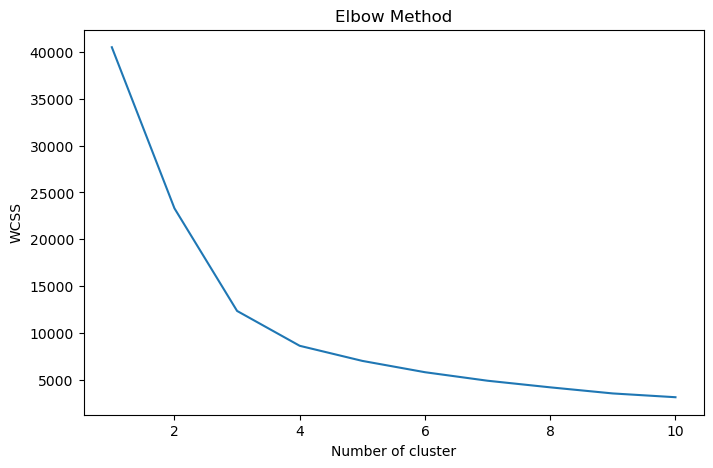

In [81]:
#Optimal Numbers of the clusters
#Use Elbow method to finding the optimal numbers
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_Data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_Data['Cluster'] = kmeans.fit_predict(features_scaled)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
customer_Data['PC1'] = principal_components[:, 0]
customer_Data['PC2'] = principal_components[:, 1]


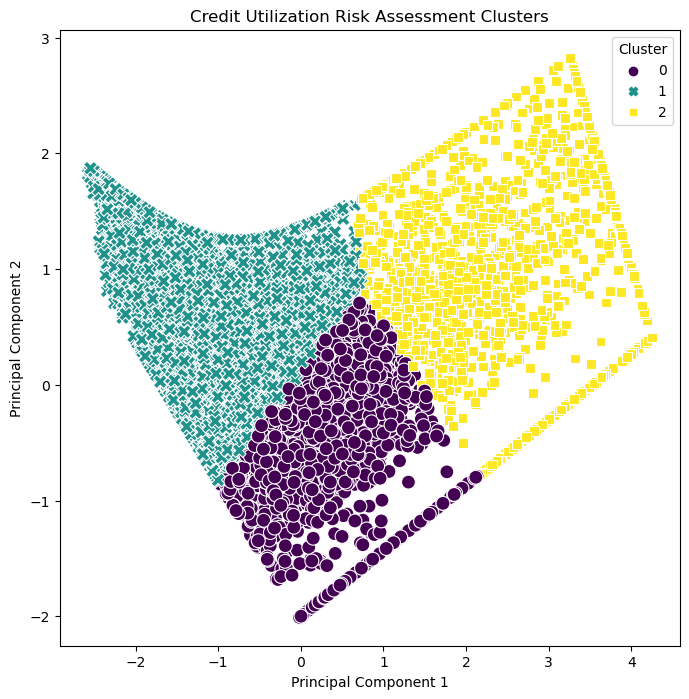

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(data=customer_Data , x='PC1', y='PC2', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Credit Utilization Risk Assessment Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


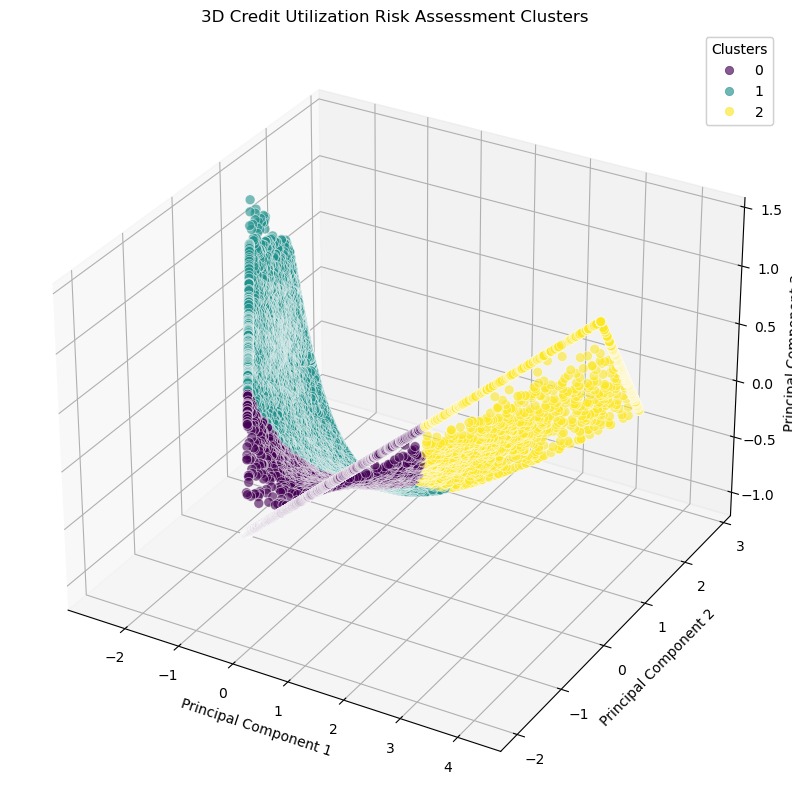

In [85]:
from mpl_toolkits.mplot3d import Axes3D

# For a 3D visualization, we'll need to perform PCA for 3 components
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(features_scaled)
data['PC1_3D'] = principal_components_3d[:, 0]
data['PC2_3D'] = principal_components_3d[:, 1]
data['PC3_3D'] = principal_components_3d[:, 2]

# 3D Plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['PC1_3D'], data['PC2_3D'], data['PC3_3D'], 
                     c=data['Cluster'], s=50, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Legend
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Credit Utilization Risk Assessment Clusters')

plt.show()


In [86]:
from sklearn.metrics import silhouette_score

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print('Silhouette Score: %.3f' % silhouette_avg)


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.463
